<img src = "https://github.com/aradavra/project-/blob/main/%D7%9E%D7%99%D7%A7%D7%95.jpg?raw=true" width = "500"/>

# Civil flights USA - cancelled and diverted

### By Amit Yosef & Arad Avrahami
### Project Number 38


##### Data Origin : https://www.kaggle.com/datasets/bordanova/2023-us-civil-flights-delay-meteo-and-aircraft

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/aradavra/project-/main/Cancelled_Diverted_2023.csv'
fly_df = pd.read_csv(url)
fly_df.head(5)

,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,...,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft
0,2023-01-25,3,Endeavor Air,N691CA,1.0,0.0,JFK,"New York, NY",Evening,0.0,...,"Ithaca/Cortland, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
1,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,MSP,"Minneapolis, MN",Morning,0.0,...,"Pittsburgh, PA",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
2,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,PIT,"Pittsburgh, PA",Afternoon,0.0,...,"Minneapolis, MN",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
3,2023-01-11,3,Endeavor Air,N926XJ,1.0,0.0,BWI,"Baltimore, MD",Afternoon,0.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
4,2023-01-25,3,Endeavor Air,N335PQ,0.0,1.0,BWI,"Baltimore, MD",Afternoon,2.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0


### Data Check

In [3]:
fly_df.columns

Index(['FlightDate', 'Day_Of_Week', 'Airline', 'Tail_Number', 'Cancelled',
       'Diverted', 'Dep_Airport', 'Dep_CityName', 'DepTime_label', 'Dep_Delay',
       'Dep_Delay_Tag', 'Dep_Delay_Type', 'Arr_Airport', 'Arr_CityName',
       'Arr_Delay', 'Arr_Delay_Type', 'Flight_Duration', 'Distance_type',
       'Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security',
       'Delay_LastAircraft'],
      dtype='object')

In [4]:
fly_df.nunique()

FlightDate             365
Day_Of_Week              7
Airline                 15
Tail_Number           5438
Cancelled                2
Diverted                 2
Dep_Airport            345
Dep_CityName           339
DepTime_label            4
Dep_Delay              625
Dep_Delay_Tag            2
Dep_Delay_Type           3
Arr_Airport            346
Arr_CityName           340
Arr_Delay                1
Arr_Delay_Type           1
Flight_Duration          1
Distance_type            3
Delay_Carrier            1
Delay_Weather            1
Delay_NAS                1
Delay_Security           1
Delay_LastAircraft       1
dtype: int64

In [5]:
fly_df.isnull().sum()

FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Cancelled             0
Diverted              0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
dtype: int64

In [6]:
fly_df['FlightDate'] = pd.to_datetime(fly_df['FlightDate'])
fly_df['Month'] = fly_df['FlightDate'].dt.month
monthly_cancellations_diversions = fly_df.groupby('Month')[['Cancelled', 'Diverted']].sum().reset_index()
monthly_cancellations_diversions.columns = ['Month', 'Total_Cancelled', 'Total_Diverted']

monthly_cancellations_diversions


,Month,Total_Cancelled,Total_Diverted
0,1,10293.0,1345.0
1,2,9018.0,983.0
2,3,7404.0,1383.0
3,4,9589.0,1603.0
4,5,3310.0,1218.0
5,6,12217.0,2239.0
6,7,14606.0,2202.0
7,8,9172.0,1673.0
8,9,7058.0,1393.0
9,10,2140.0,825.0


# Yearly and Monthly Comparision

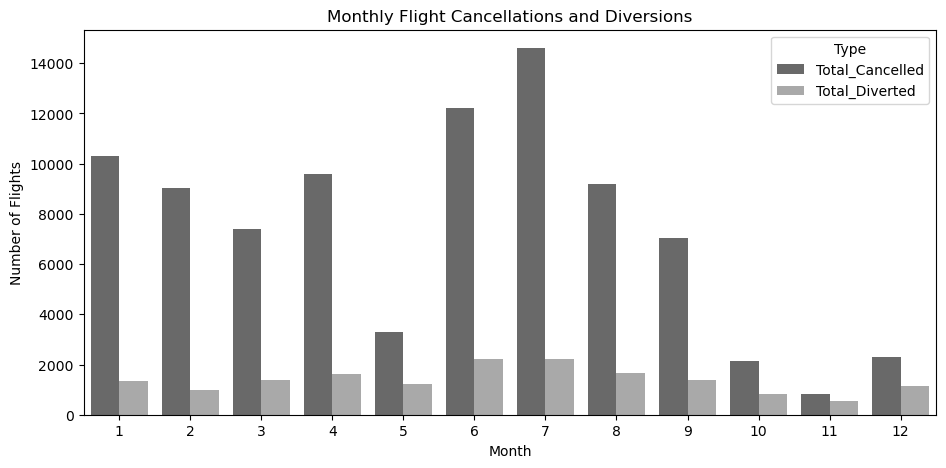

In [7]:
combined_stat = monthly_cancellations_diversions.melt(id_vars='Month', var_name='Type', value_name='Count')
plt.figure(figsize=(11, 5))
sns.barplot(x='Month', y='Count', hue='Type', data=combined_stat, palette=['dimgrey', 'darkgrey'])
plt.title('Monthly Flight Cancellations and Diversions')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.legend(title='Type')
plt.show()

## January and February monthly analysis


In [8]:
fly_df['Day'] = fly_df['FlightDate'].dt.day
january = fly_df[fly_df['Month'] == 1]
january_cancel = january.groupby('Day')['Cancelled'].sum().reset_index()



In [9]:
february = fly_df[fly_df['Month'] == 2]
february_cancel = february.groupby('Day')['Cancelled'].sum().reset_index()

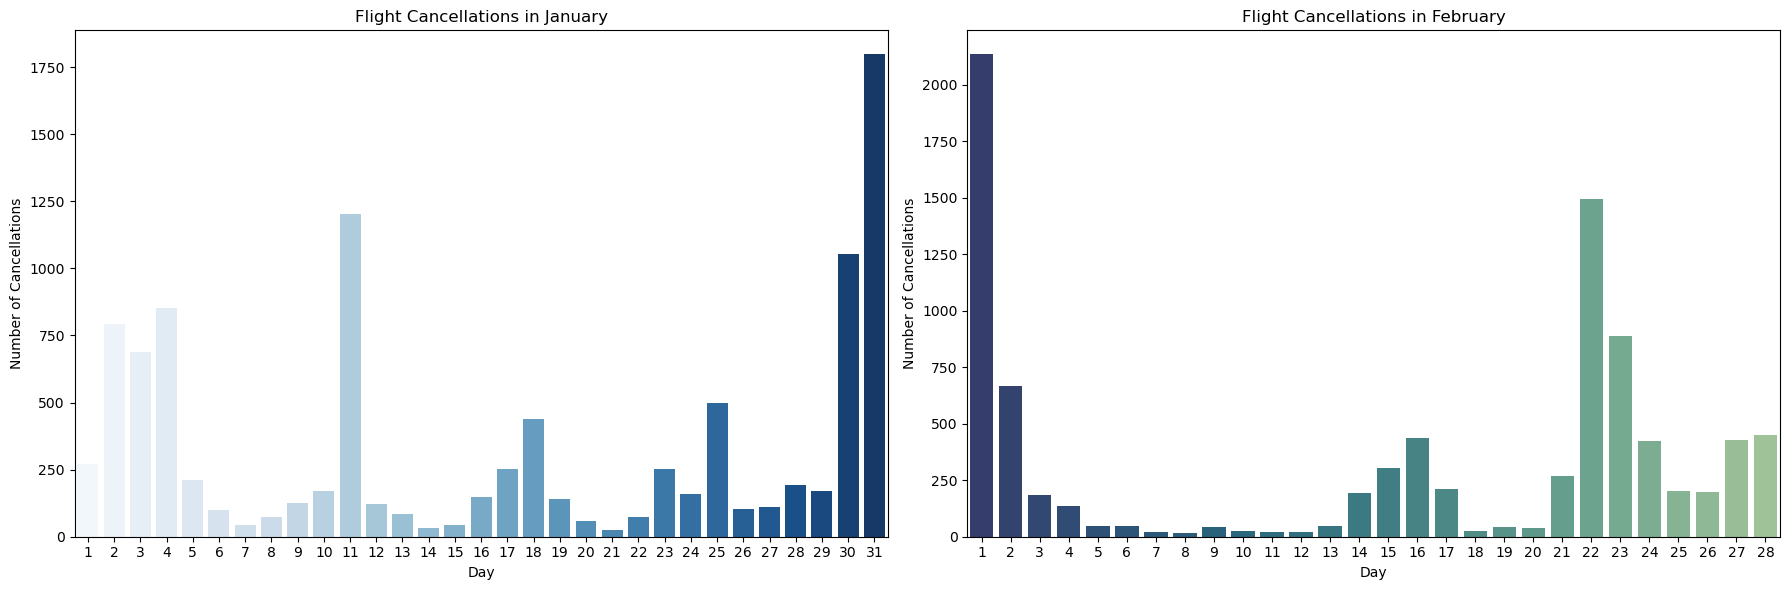

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(ax=axes[0], x='Day', y='Cancelled', data=january_cancel, palette='Blues')
axes[0].set_title('Flight Cancellations in January')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Number of Cancellations')

sns.barplot(ax=axes[1], x='Day', y='Cancelled', data=february_cancel, palette='crest_r')
axes[1].set_title('Flight Cancellations in February')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Number of Cancellations')

plt.tight_layout()
plt.show()

### DOT System Malfunction


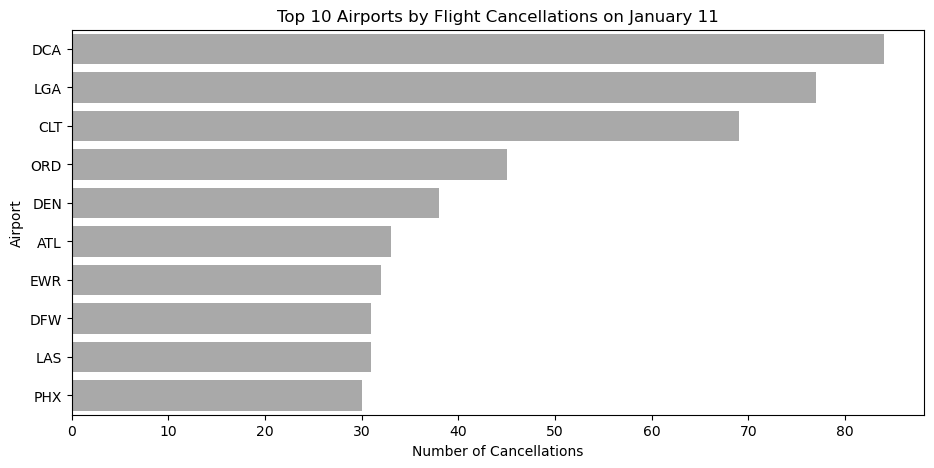

In [11]:
def count_cancellations_by_airport(start_date, end_date, fly_df):
    sum_dates = (fly_df['FlightDate'] >= start_date) & (fly_df['FlightDate'] <= end_date)
    return fly_df[sum_dates].groupby('Dep_Airport')['Cancelled'].sum().reset_index().nlargest(10, 'Cancelled')
january_11 = count_cancellations_by_airport('2023-01-11', '2023-01-11', fly_df)

plt.figure(figsize=(11, 5))
sns.barplot(x='Cancelled', y='Dep_Airport', data=january_11, color='darkgrey')
plt.title('Top 10 Airports by Flight Cancellations on January 11')
plt.xlabel('Number of Cancellations')
plt.ylabel('Airport')
plt.show()

### Top 10 most affected Airports by weather changes



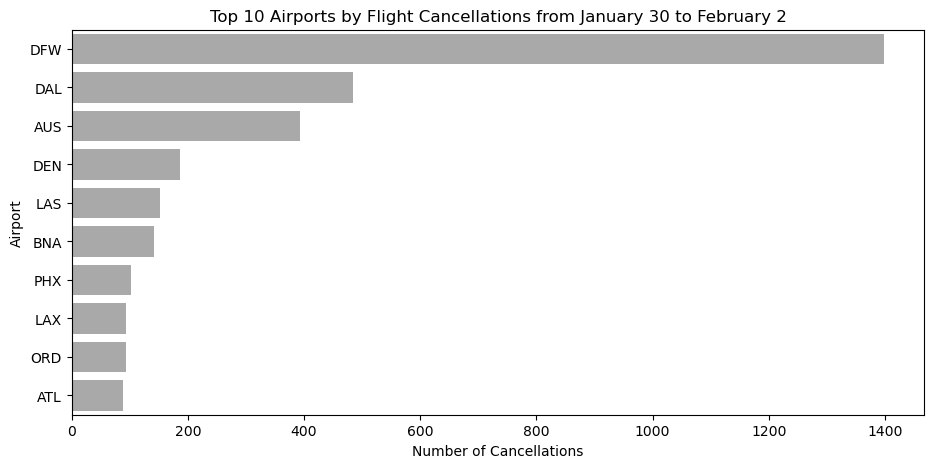

In [12]:
jan30_to_feb2 = count_cancellations_by_airport('2023-01-30', '2023-02-02', fly_df)

plt.figure(figsize=(11, 5))
sns.barplot(x='Cancelled', y='Dep_Airport', data=jan30_to_feb2, color='darkgrey')
plt.title('Top 10 Airports by Flight Cancellations from January 30 to February 2')
plt.xlabel('Number of Cancellations')
plt.ylabel('Airport')
plt.show()

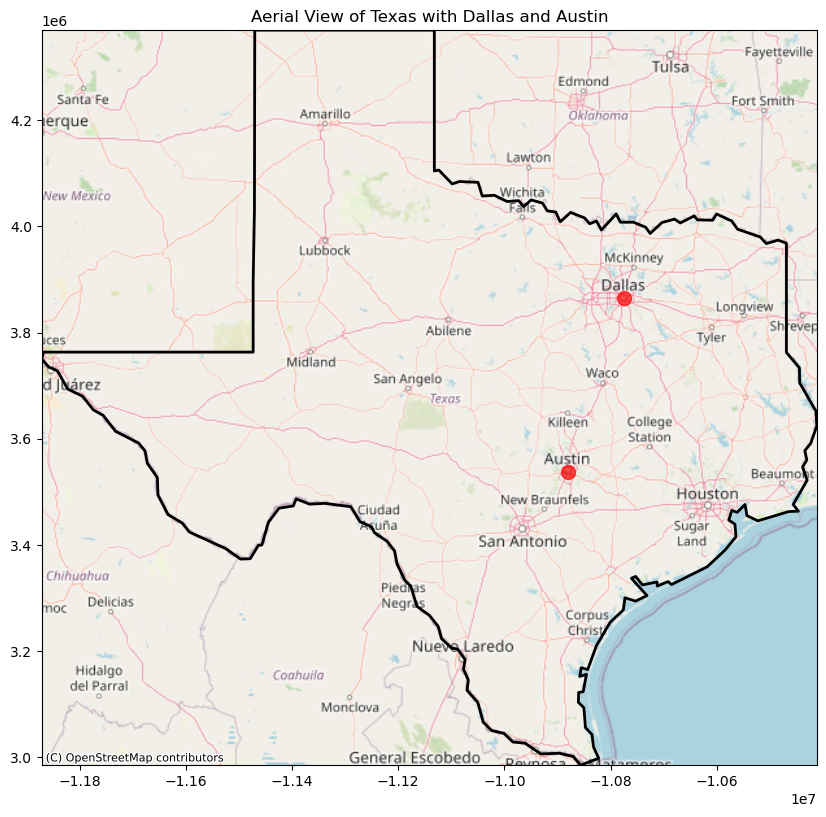

In [13]:
import geopandas as gpd
import contextily as ctx

states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
texas = states[states['name'] == 'Texas']
cities = {
    'Dallas': (-96.7970, 32.7767),
    'Austin': (-97.7431, 30.2672)
}
gdf_texas = texas.to_crs(epsg=3857)
gdf_cities = gpd.GeoDataFrame(
    cities.items(),
    columns=['City', 'Coordinates'],
    geometry=gpd.points_from_xy([coord[0] for coord in cities.values()], [coord[1] for coord in cities.values()]),
    crs="EPSG:4326"
).to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_texas.boundary.plot(ax=ax, color='black', linewidth=2)

ctx.add_basemap(ax, crs=gdf_texas.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
gdf_cities.plot(ax=ax, color='red', markersize=100, alpha=0.7)
ax.set_xlim(gdf_texas.total_bounds[[0, 2]])
ax.set_ylim(gdf_texas.total_bounds[[1, 3]])
ax.set_title('Aerial View of Texas with Dallas and Austin')
plt.show()


### The most affected Airlines

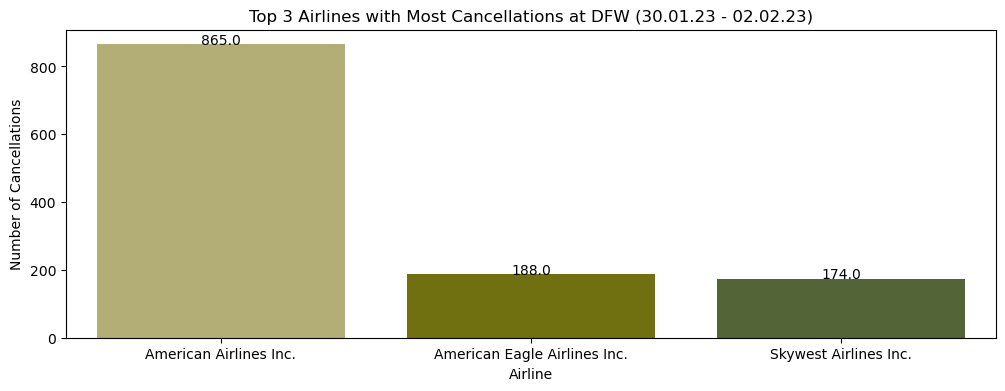

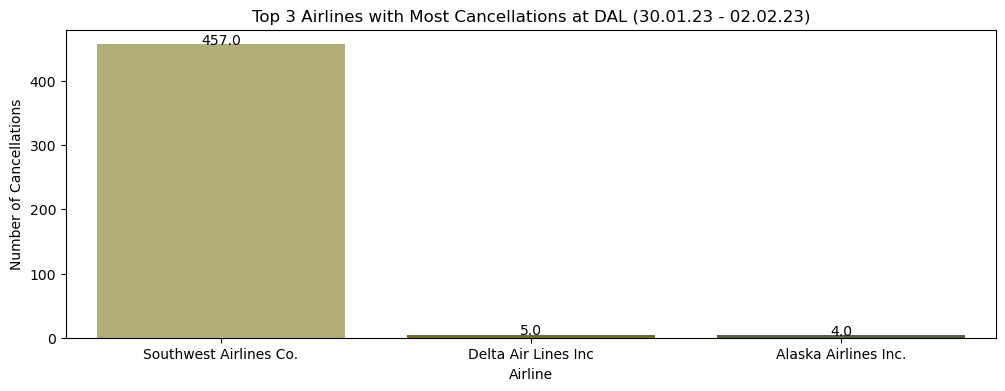

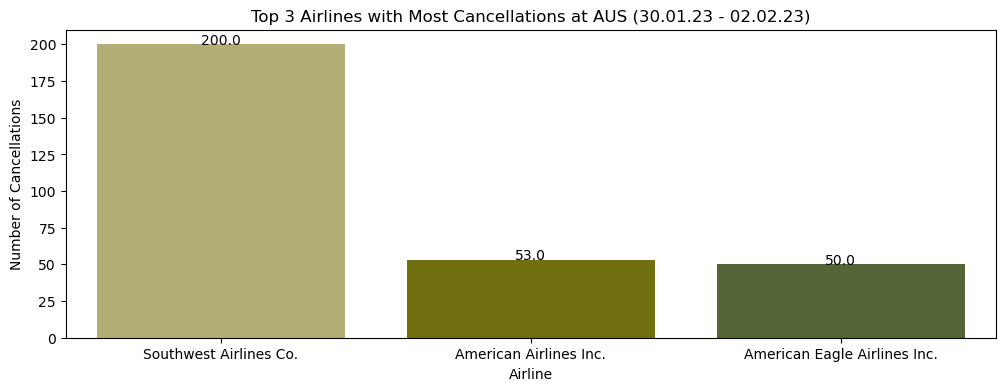

In [14]:
dates_range = (fly_df['FlightDate'] >= '2023-01-30') & (fly_df['FlightDate'] <= '2023-02-02')
selected_airports = ['DFW', 'DAL', 'AUS']
mixed_check = fly_df[dates_range & fly_df['Arr_Airport'].isin(selected_airports)]

def top_3_airlines_for_airport(airport):
    airport_data = mixed_check[mixed_check['Arr_Airport'] == airport]
    top_3_airlines = airport_data.groupby('Airline')['Cancelled'].sum().nlargest(3).reset_index()
    plt.figure(figsize=(12, 4))
    sns.barplot(x='Airline', y='Cancelled', data=top_3_airlines, palette=['darkkhaki','olive','darkolivegreen'])
    plt.title(f'Top 3 Airlines with Most Cancellations at {airport} (30.01.23 - 02.02.23)')
    plt.xlabel('Airline')
    plt.ylabel('Number of Cancellations')
    for index, row in top_3_airlines.iterrows():
        plt.text(index, row['Cancelled'] + 0.1, str(row['Cancelled']), ha='center')
    plt.show()

for airport in selected_airports:
    top_3_airlines_for_airport(airport)

### Southwest flights System Malfunction



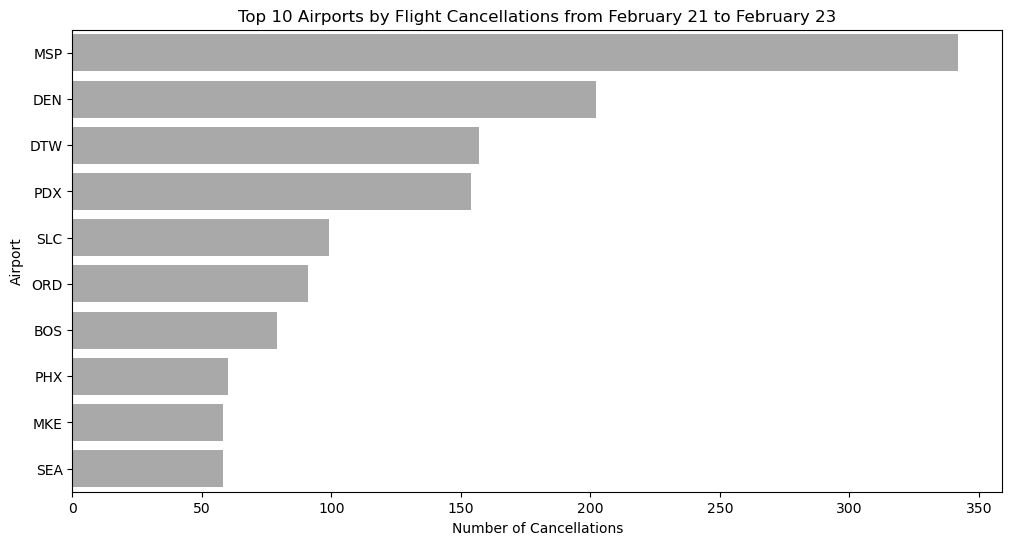

In [15]:
feb21_feb23 = count_cancellations_by_airport('2023-02-21', '2023-02-23', fly_df)
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancelled', y='Dep_Airport', data=feb21_feb23, color='darkgrey')
plt.title('Top 10 Airports by Flight Cancellations from February 21 to February 23')
plt.xlabel('Number of Cancellations')
plt.ylabel('Airport')
plt.show()

## Flight cancellations during the Holidays



#### Easter (09\04\23 - 11\04\23)
#### ThanksGiving (22\11\23 - 24\11\23)
#### Christmas (24\12\23 - 26\12\23)



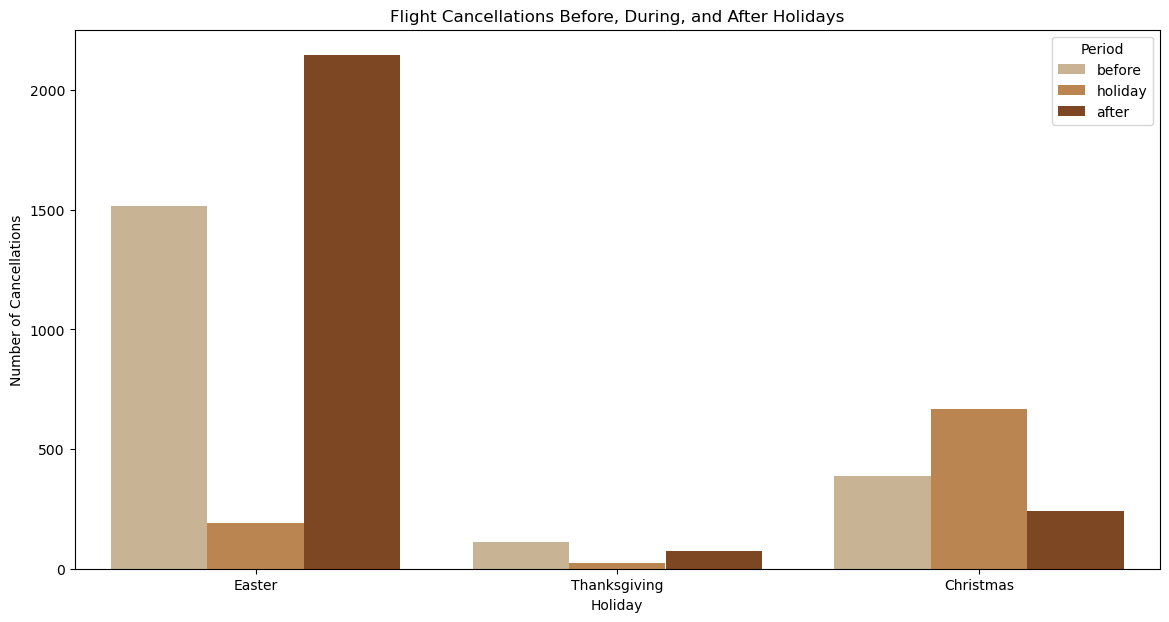

In [16]:
american_holidays = {
    'Easter': {
        'holiday': ('2023-04-09', '2023-04-11'),
        'before': ('2023-04-04', '2023-04-08'),
        'after': ('2023-04-12', '2023-04-16')
    },
    'Thanksgiving': {
        'holiday': ('2023-11-22', '2023-11-24'),
        'before': ('2023-11-19', '2023-11-21'),
        'after': ('2023-11-25', '2023-11-27')
    },

     'Christmas': {
        'holiday': ('2023-12-24', '2023-12-26'),
        'before': ('2023-12-19', '2023-12-23'),
        'after': ('2023-12-27', '2023-12-31')
    }
}


def count_period_cancellations(during, fly_df):
    start_date, end_date = during
    chosen_dates = (fly_df['FlightDate'] >= start_date) & (fly_df['FlightDate'] <= end_date)
    return fly_df[chosen_dates]['Cancelled'].sum()

holiday_cancellations = {}
for holiday, periods in american_holidays.items():
    holiday_cancellations[holiday] = {}
    for period_name, dates in periods.items():
        holiday_cancellations[holiday][period_name] = count_period_cancellations(dates, fly_df)

holiday_df = pd.DataFrame(holiday_cancellations).T
holiday_df.reset_index(inplace=True)
holiday_df = holiday_df.melt(id_vars='index', var_name='Period', value_name='Cancellations')
holiday_df.rename(columns={'index': 'Holiday'}, inplace=True)
period_order = ['before', 'holiday', 'after']

plt.figure(figsize=(14, 7))
sns.barplot(x='Holiday', y='Cancellations', hue='Period', data=holiday_df, hue_order=period_order, palette=['tan','peru','saddlebrown'])
plt.title('Flight Cancellations Before, During, and After Holidays')
plt.xlabel('Holiday')
plt.ylabel('Number of Cancellations')
plt.legend(title='Period')
plt.show()


In [17]:
fly_df[['Dep_City', 'Dep_State']] = fly_df['Dep_CityName'].str.split(', ', expand=True)

fly_df[['Dep_CityName', 'Dep_City', 'Dep_State']].head()


,Dep_CityName,Dep_City,Dep_State
0,"New York, NY",New York,NY
1,"Minneapolis, MN",Minneapolis,MN
2,"Pittsburgh, PA",Pittsburgh,PA
3,"Baltimore, MD",Baltimore,MD
4,"Baltimore, MD",Baltimore,MD


### Cancelletions by top 5 states - highest and lowest


In [18]:
american_holidays_complete = {
    'Easter': ('2023-04-04', '2023-04-16'),
    'Thanksgiving': ('2023-11-18', '2023-11-28'),
    'Christmas': ('2023-12-19', '2023-12-31')
}

def count_tot_cancellations(during, fly_df):
    start_date, end_date = during
    chosen_dates = (fly_df['FlightDate'] >= start_date) & (fly_df['FlightDate'] <= end_date)
    return fly_df[chosen_dates].groupby('Dep_State')['Cancelled'].sum().reset_index()

holiday_cancellations = {}
for holiday, dates in american_holidays_complete.items():
    holiday_cancellations[holiday] = count_tot_cancellations(dates, fly_df)

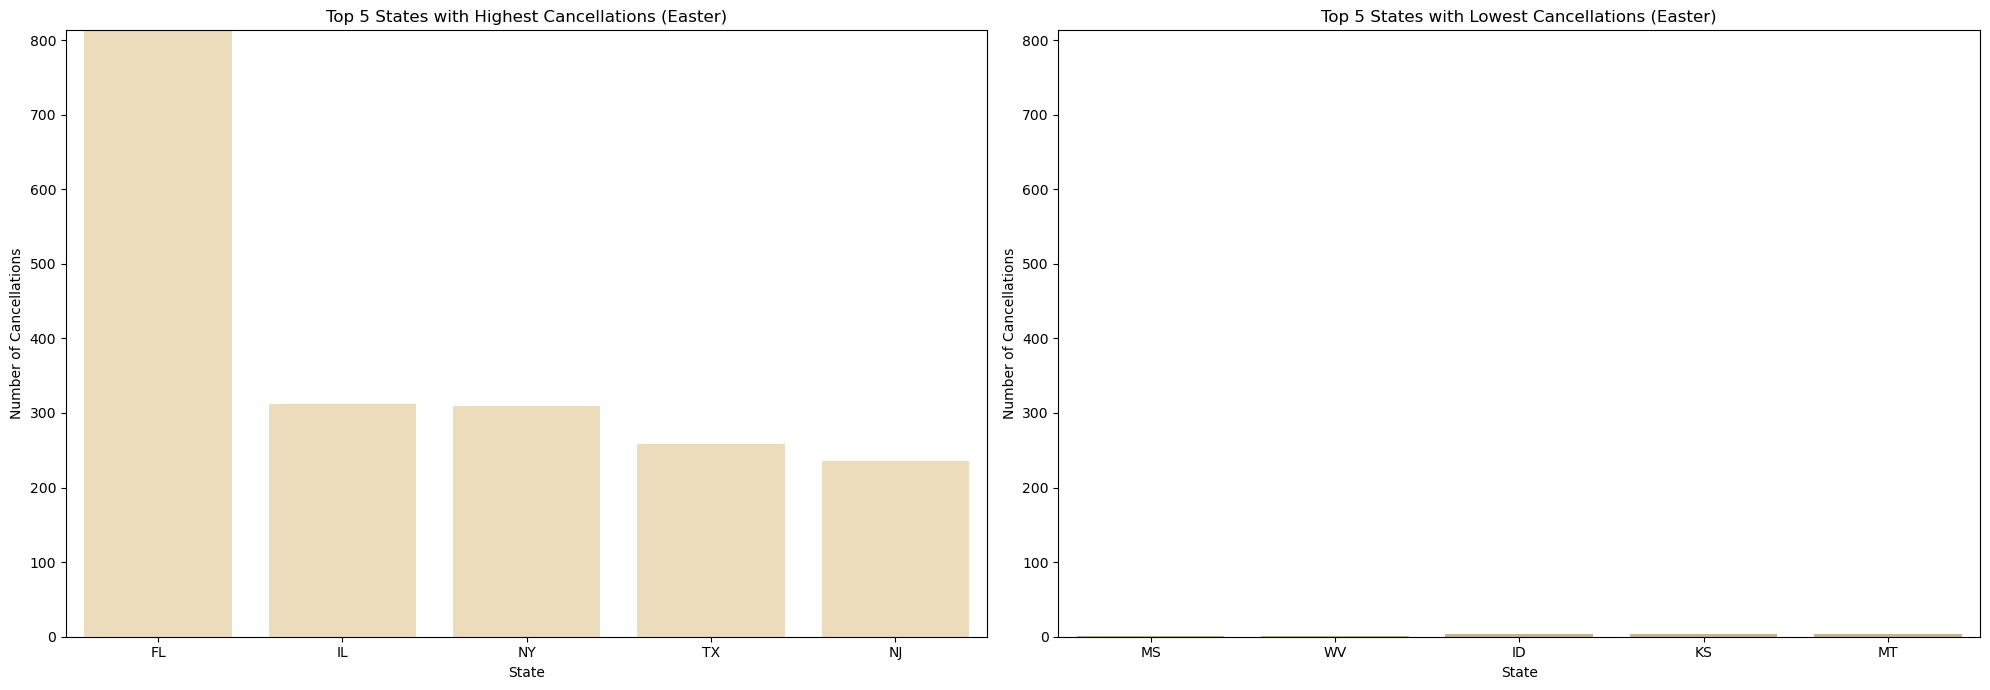

In [19]:
def plot_top_and_bottom_states(holiday_data, holiday, top_s=5, bottom_s=5):
    subset = holiday_data[holiday]
    subset['Cancelled'] = subset['Cancelled'].clip(lower=0)
    top_states = subset.nlargest(top_s, 'Cancelled')
    bottom_states = subset.nsmallest(bottom_s, 'Cancelled')
    
    y_max = max(top_states['Cancelled'].max(), bottom_states['Cancelled'].max())

    
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    sns.barplot(x='Dep_State', y='Cancelled', data=top_states, ax=axes[0], palette=['wheat'])
    axes[0].set_title(f'Top {top_s} States with Highest Cancellations ({holiday})')
    axes[0].set_xlabel('State')
    axes[0].set_ylabel('Number of Cancellations')
    axes[0].set_ylim(0, y_max)
    sns.barplot(x='Dep_State', y='Cancelled', data=bottom_states, ax=axes[1], palette=['tan'])
    axes[1].set_title(f'Top {bottom_s} States with Lowest Cancellations ({holiday})')
    axes[1].set_xlabel('State')
    axes[1].set_ylabel('Number of Cancellations')
    axes[1].set_ylim(0, y_max)


    plt.tight_layout()
    plt.show()

plot_top_and_bottom_states(holiday_cancellations, 'Easter')


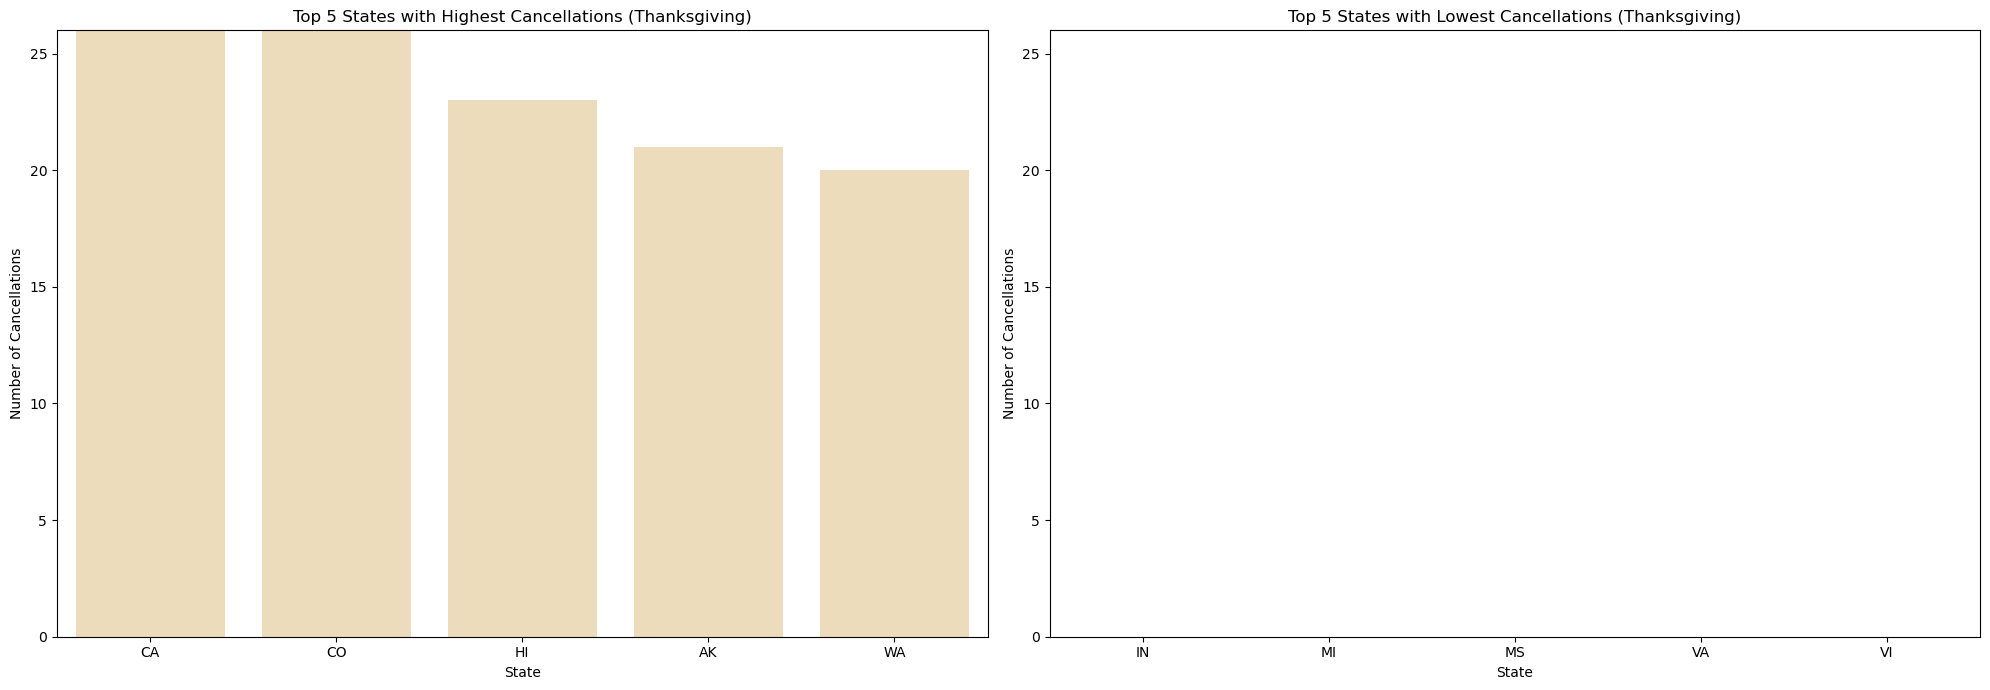

In [20]:
plot_top_and_bottom_states(holiday_cancellations, 'Thanksgiving')

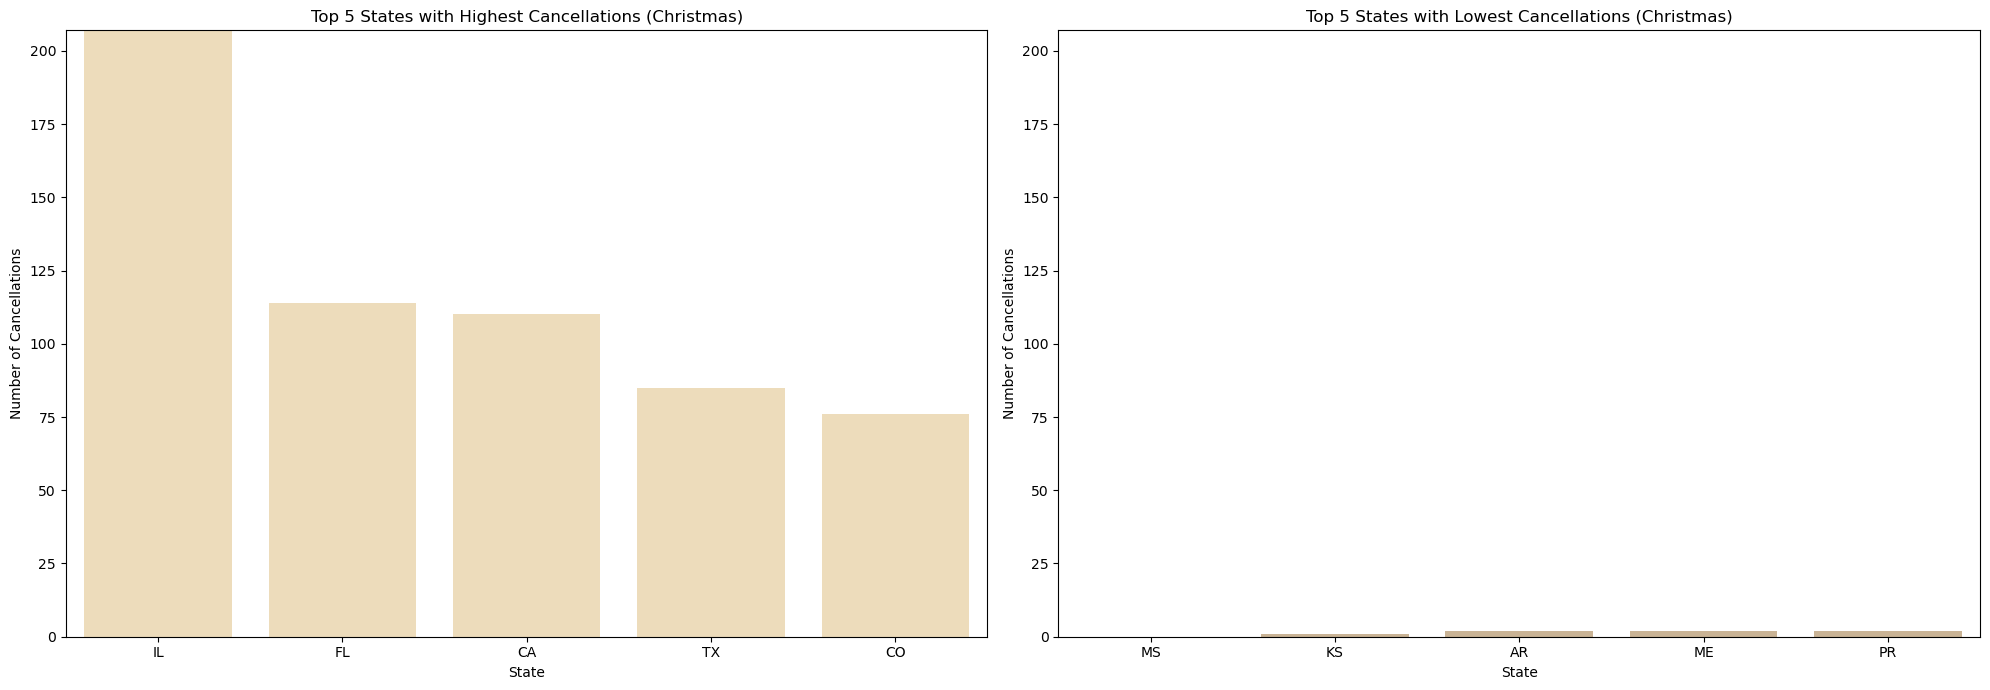

In [21]:
plot_top_and_bottom_states(holiday_cancellations, 'Christmas')

## Your Trip Advisor - Which Airline is the Best?


In [22]:
monthly_sum_by_airline = fly_df.groupby(['Month', 'Airline'])['Cancelled'].sum().reset_index()
top_3_airlines_month = monthly_sum_by_airline.groupby('Month').apply(lambda x: x.nlargest(3, 'Cancelled')).reset_index(drop=True)
airlines_count = top_3_airlines_month['Airline'].value_counts().reset_index()
airlines_count.columns = ['Airline', 'Number_of_Months_in_Top_3']

airlines_count


,Airline,Number_of_Months_in_Top_3
0,Southwest Airlines Co.,8
1,Skywest Airlines Inc.,6
2,American Airlines Inc.,5
3,Delta Air Lines Inc,5
4,United Air Lines Inc.,4
5,Republic Airways,3
6,Endeavor Air,2
7,JetBlue Airways,1
8,Spirit Air Lines,1
9,Alaska Airlines Inc.,1


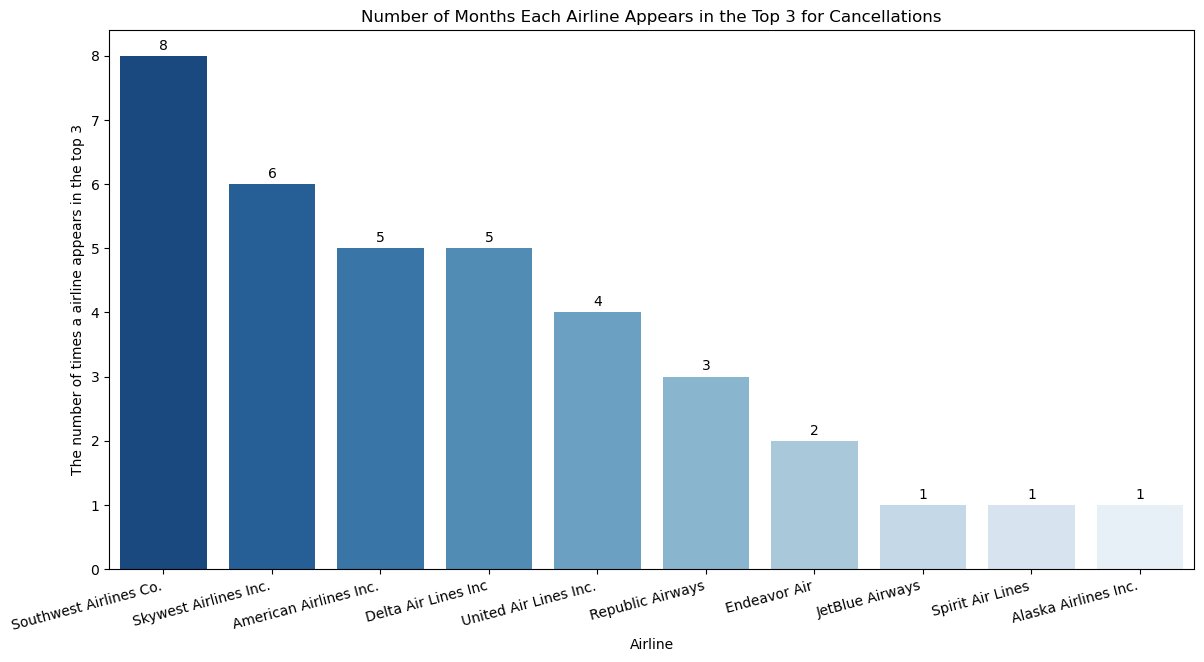

In [23]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Airline', y='Number_of_Months_in_Top_3', data=airlines_count, palette='Blues_r')
plt.title('Number of Months Each Airline Appears in the Top 3 for Cancellations')
plt.xlabel('Airline')
plt.ylabel('The number of times a airline appears in the top 3')
for index, row in airlines_count.iterrows():
    plt.text(index, row['Number_of_Months_in_Top_3'] + 0.1, str(row['Number_of_Months_in_Top_3']), ha='center')
    
plt.xticks(rotation=15, ha='right')
plt.show()


In [24]:
sum_top_airline = fly_df.groupby('Airline')['Cancelled'].sum().reset_index()
top_4_airlines = sum_top_airline.nlargest(4, 'Cancelled')
print("Top 4 Airlines with the Most Cancellations:")
top_4_airlines

Top 4 Airlines with the Most Cancellations:


,Airline,Cancelled
12,Southwest Airlines Co.,14325.0
14,United Air Lines Inc.,10270.0
4,Delta Air Lines Inc,10016.0
2,American Airlines Inc.,9978.0


In [25]:
bottom_4_airlines = sum_top_airline.nsmallest(4, 'Cancelled')
print("Top 4 Airlines with the Fewest Cancellations:")
bottom_4_airlines

Top 4 Airlines with the Fewest Cancellations:


,Airline,Cancelled
1,Allegiant Air,782.0
7,Hawaiian Airlines Inc.,1053.0
0,Alaska Airlines Inc.,1977.0
3,American Eagle Airlines Inc.,2291.0


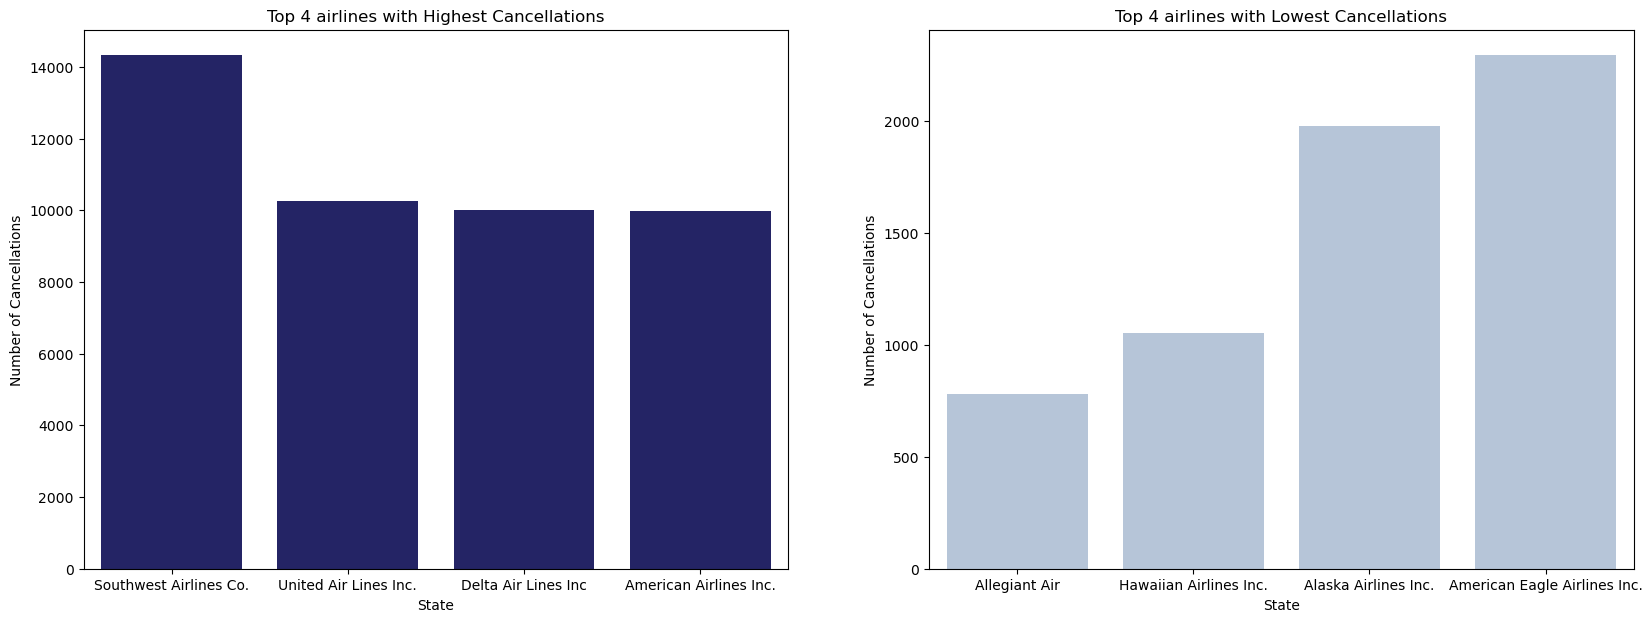

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.barplot(x='Airline', y='Cancelled', data=top_4_airlines, ax=axes[0], palette=['midnightblue'])
axes[0].set_title('Top 4 airlines with Highest Cancellations')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Cancellations')
sns.barplot(x='Airline', y='Cancelled', data=bottom_4_airlines, ax=axes[1], palette=['lightsteelblue'])
axes[1].set_title('Top 4 airlines with Lowest Cancellations')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Number of Cancellations')

plt.show()

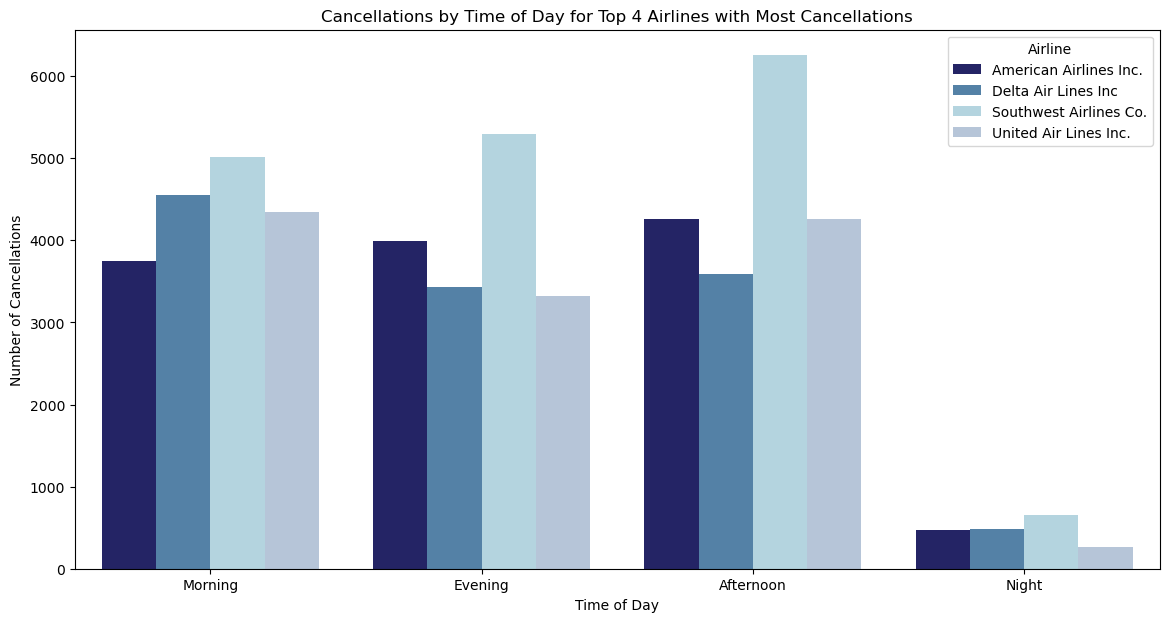

In [27]:
cancel_by_part_of_day = sum_top_airline.nlargest(4, 'Cancelled')['Airline']
top_4_airlines_data = fly_df[fly_df['Airline'].isin(cancel_by_part_of_day)]

plt.figure(figsize=(14, 7))
sns.countplot(x='DepTime_label', hue='Airline', data=top_4_airlines_data, palette=['midnightblue','steelblue','lightblue','lightsteelblue'])
plt.title('Cancellations by Time of Day for Top 4 Airlines with Most Cancellations')
plt.xlabel('Time of Day')
plt.ylabel('Number of Cancellations')
plt.legend(title='Airline')
plt.show()

## Based on DOT 2023:
#### We added the approximately number of internal flights by Airlines


#### Percentegas of Cancelletion From the Total

In [28]:
fly_df.groupby('Cancelled')['Airline'].value_counts()

Cancelled  Airline                     
0.0        Southwest Airlines Co.           2902
           American Airlines Inc.           2495
           Skywest Airlines Inc.            2050
           Delta Air Lines Inc              2039
           United Air Lines Inc.            1910
           JetBlue Airways                  1174
           Alaska Airlines Inc.              724
           Republic Airways                  622
           Spirit Air Lines                  547
           American Eagle Airlines Inc.      502
           PSA Airlines                      501
           Endeavor Air                      373
           Allegiant Air                     332
           Frontier Airlines Inc.            309
           Hawaiian Airlines Inc.             72
1.0        Southwest Airlines Co.          14325
           United Air Lines Inc.           10270
           Delta Air Lines Inc             10016
           American Airlines Inc.           9978
           Skywest Airlines I

In [29]:
Airline_cancellations = {
    'United Air Lines Inc.' : 10270,
    'Delta Air Lines Inc' : 10016,
    'Southwest Airlines Co.': 14325, 
    'American Airlines Inc.' : 9978,
    'Skywest Airlines Inc.' : 8252,
    'Republic Airways' : 8163,
    'JetBlue Airways' : 5763,
    'Spirit Air Lines' : 4479,
    'Endeavor Air' : 4242,
    'Frontier Airlines Inc.' : 3774,
    'PSA Airlines' : 2571,
    'American Eagle Airlines Inc.' : 2291,
    'Alaska Airlines Inc.' : 1977,
    'Hawaiian Airlines Inc. ' : 1053,
    'Allegiant Air' : 782

}

yearly_flights = {
    'American Airlines Inc.': 1270000,
    'Southwest Airlines Co.': 1230000,
    'United Air Lines Inc.': 789730,
    'Delta Air Lines Inc': 915000,
    'Skywest Airlines Inc.' : 177000,
    'Republic Airways' : 184000,
    'JetBlue Airways' : 340000,
    'Spirit Air Lines' : 123000,
    'Endeavor Air' : 155000,
    'Frontier Airlines Inc.' : 104000,
    'PSA Airlines' : 154000,
    'American Eagle Airlines Inc.' : 365000,
    'Alaska Airlines Inc.' : 474500,
    'Hawaiian Airlines Inc. ' : 64000,
    'Allegiant Air' : 123000
}

result_percentages = {}
for airline in Airline_cancellations:
    if airline in yearly_flights:
        result_percentages[airline] = round((Airline_cancellations[airline] / yearly_flights[airline]) * 100, 3)
sorted(result_percentages.items(), key=lambda x:x[1])

[('Alaska Airlines Inc.', 0.417),
 ('American Eagle Airlines Inc.', 0.628),
 ('Allegiant Air', 0.636),
 ('American Airlines Inc.', 0.786),
 ('Delta Air Lines Inc', 1.095),
 ('Southwest Airlines Co.', 1.165),
 ('United Air Lines Inc.', 1.3),
 ('Hawaiian Airlines Inc. ', 1.645),
 ('PSA Airlines', 1.669),
 ('JetBlue Airways', 1.695),
 ('Endeavor Air', 2.737),
 ('Frontier Airlines Inc.', 3.629),
 ('Spirit Air Lines', 3.641),
 ('Republic Airways', 4.436),
 ('Skywest Airlines Inc.', 4.662)]

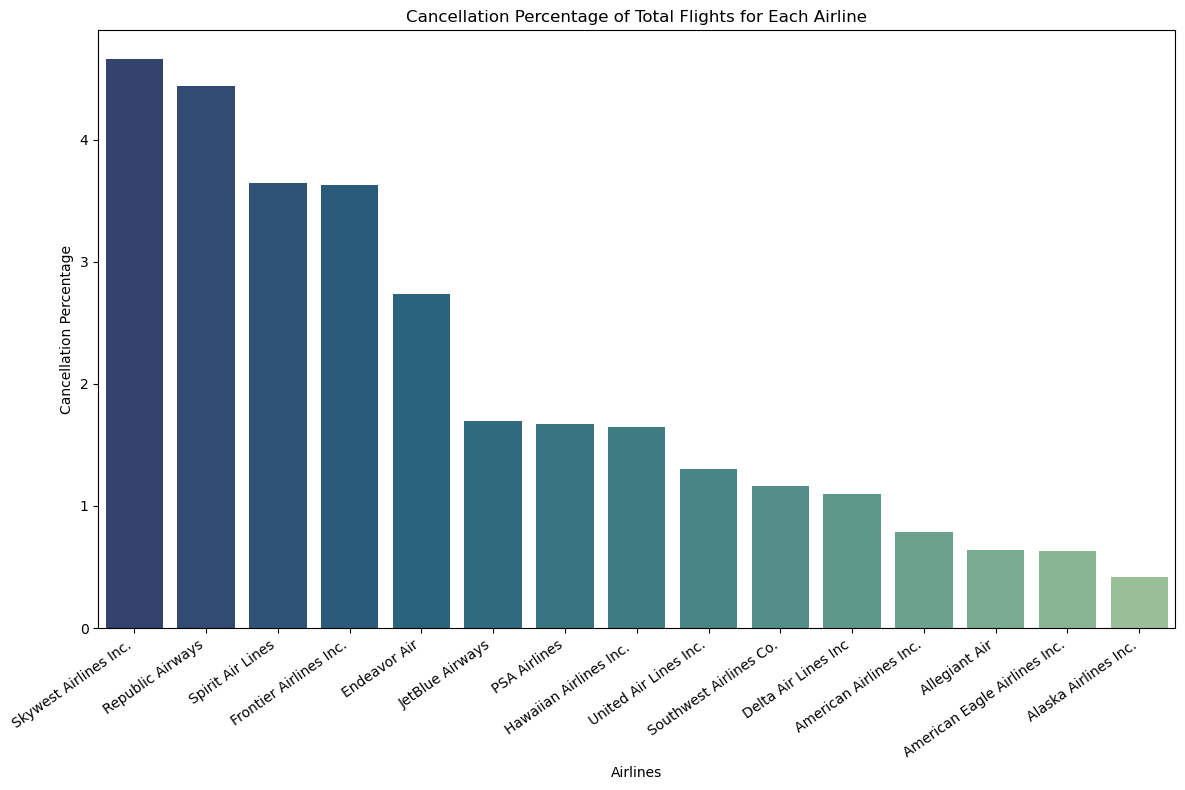

In [30]:
result_df = pd.DataFrame(list(result_percentages.items()), columns=['Airline', 'Cancellation_Percentage'])
result_df = result_df.sort_values(by='Cancellation_Percentage', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Airline', y='Cancellation_Percentage', data=result_df, palette='crest_r')
plt.xlabel('Airlines')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage of Total Flights for Each Airline')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()


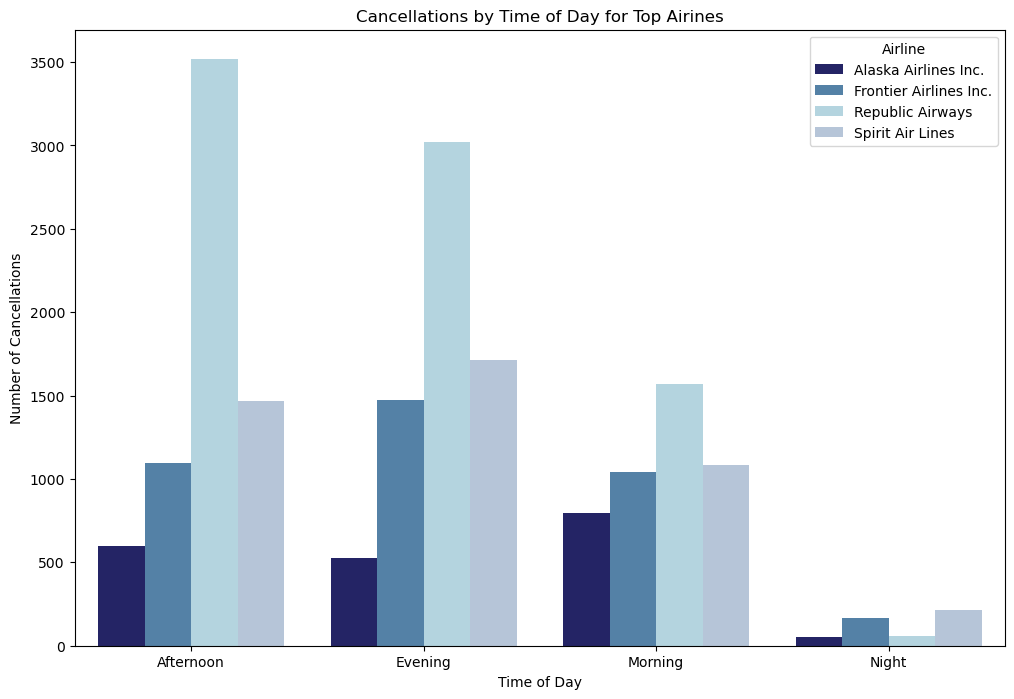

In [31]:
filtered_top_airlines = ["Alaska Airlines Inc.", "Republic Airways", "Spirit Air Lines", "Frontier Airlines Inc."]
filtered_top_df = fly_df[(fly_df['Airline'].isin(filtered_top_airlines)) & (fly_df['Cancelled'] == 1.0)]
cancelled_top_counts = filtered_top_df.groupby(['Airline', 'DepTime_label']).size().reset_index(name='Cancellations')

plt.figure(figsize=(12, 8))
sns.barplot(data=cancelled_top_counts, x='DepTime_label', y='Cancellations', hue='Airline',palette=['midnightblue','steelblue','lightblue','lightsteelblue'])
plt.title('Cancellations by Time of Day for Top Airines')
plt.xlabel('Time of Day')
plt.ylabel('Number of Cancellations')
plt.legend(title='Airline')
plt.show()


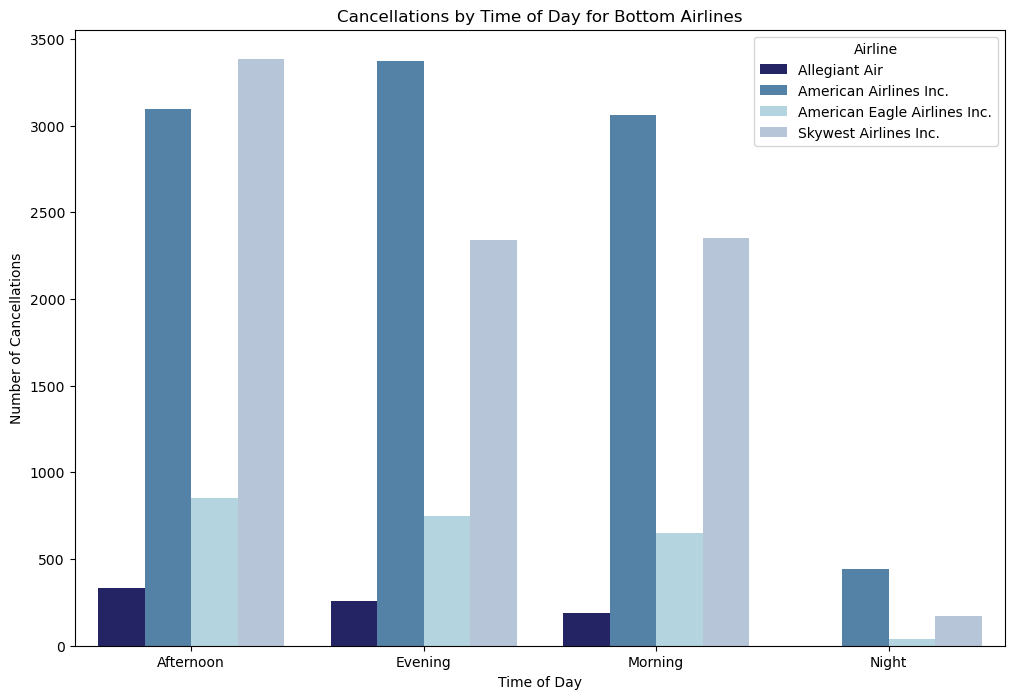

In [32]:
filtered_bottom_airlines = ["Skywest Airlines Inc.", "American Eagle Airlines Inc.", "Allegiant Air", "American Airlines Inc."]
filtered_bottom_df = fly_df[(fly_df['Airline'].isin(filtered_bottom_airlines)) & (fly_df['Cancelled'] == 1.0)]
cancelled_counts = filtered_bottom_df.groupby(['Airline', 'DepTime_label']).size().reset_index(name='Cancellations')

plt.figure(figsize=(12, 8))
sns.barplot(data=cancelled_counts, x='DepTime_label', y='Cancellations', hue='Airline',palette=['midnightblue','steelblue','lightblue','lightsteelblue'])
plt.title('Cancellations by Time of Day for Bottom Airlines')
plt.xlabel('Time of Day')
plt.ylabel('Number of Cancellations')
plt.legend(title='Airline')
plt.show()
